<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Cosine_Euclidean_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

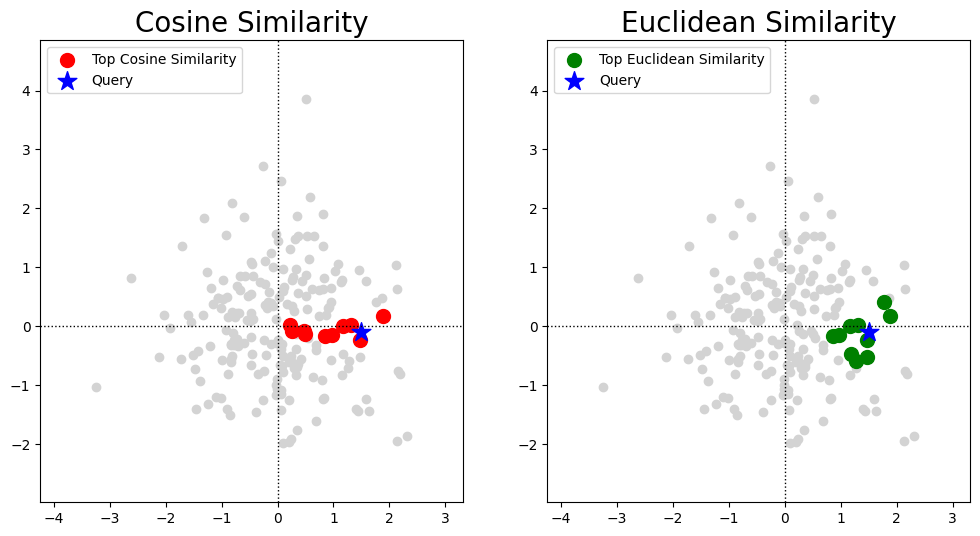

Animation saved as cosine_vs_knn_animation_with_axes.gif


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Set random seed for reproducibility and generate sample data
np.random.seed(42)
data = np.random.randn(200, 2)  # 200 points in 2D

# Number of neighbors to highlight
k = 10

# Function to compute cosine similarity between two vectors
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Define the query point trajectory: moves on a circle
def query_point(frame, total_frames):
    angle = 2 * np.pi * frame / total_frames
    # Circle radius of 1.5 so that the query stays near the center of the data
    return np.array([1.5 * np.cos(angle), 1.5 * np.sin(angle)])

# Set up the figure with two subplots (side-by-side)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
total_frames = 100  # Total number of frames in the animation

# Animation update function
def update(frame):
    query = query_point(frame, total_frames)

    # Compute cosine similarity for each point relative to the query
    cosine_scores = np.array([cosine_similarity(p, query) for p in data])
    # Select indices of the k points with the highest cosine similarity
    indices_cosine = np.argsort(cosine_scores)[-k:]

    # Compute Euclidean distances from each point to the query
    euclidean_distances = np.linalg.norm(data - query, axis=1)
    # Select indices of the k points with the smallest distances
    indices_euclidean = np.argsort(euclidean_distances)[:k]

    # Clear previous drawings on both axes and add dotted axis lines through origin
    for ax in axs:
        ax.cla()
        # Plot dotted x and y axis lines passing through origin
        ax.axhline(0, linestyle=':', color='black', linewidth=1)
        ax.axvline(0, linestyle=':', color='black', linewidth=1)
        # Plot all points in light gray
        ax.scatter(data[:, 0], data[:, 1], color='lightgray')
        # Set consistent limits so the view does not change
        ax.set_xlim(data[:, 0].min() - 1, data[:, 0].max() + 1)
        ax.set_ylim(data[:, 1].min() - 1, data[:, 1].max() + 1)

    # Left subplot: Cosine similarity based neighbors
    axs[0].scatter(data[indices_cosine, 0], data[indices_cosine, 1],
                   color='red', s=100, label='Top Cosine Similarity')
    axs[0].scatter(query[0], query[1], color='blue', marker='*',
                   s=200, label='Query')
    axs[0].set_title("Cosine Similarity", fontsize=20)
    axs[0].legend()

    # Right subplot: Euclidean-distance (KNN) based neighbors
    axs[1].scatter(data[indices_euclidean, 0], data[indices_euclidean, 1],
                   color='green', s=100, label="Top Euclidean Similarity")
    axs[1].scatter(query[0], query[1], color='blue', marker='*',
                   s=200, label='Query')
    axs[1].set_title("Euclidean Similarity", fontsize=20)
    axs[1].legend()

# Create the animation
anim = FuncAnimation(fig, update, frames=total_frames, interval=100, repeat=True)

# Save the animation as a GIF file
gif_filename = "cosine_vs_knn_animation_with_axes.gif"
writer = PillowWriter(fps=10)
anim.save(gif_filename, writer=writer)

plt.show()
print(f"Animation saved as {gif_filename}")
